### Assignment 04 
### Student Name: Daekyung park
### Student Id: 101104521

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


myDF = pd.read_csv("assign04.csv")


# first three rows of the datafram
print(myDF.head(3))

   ID  Range  Value Type Zip Code Model   Cost      Continent
0  10    192     50    F   NXEYEM  EX85  [56$]           Asia
1  20    299     21    M   VNFKZD  CT41  [18$]           Asia
2  30    378     28    X   IMGMFY  VN81  [90$]  North America


In [35]:
# Drop "Model" column
df_dropped_MODEL = myDF.drop(columns=['Model'])
print(df_dropped_MODEL.head(3))


   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50    F   NXEYEM  [56$]           Asia
1  20    299     21    M   VNFKZD  [18$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America


In [36]:
# Drop "Model" column permanently
myDF = myDF.drop(columns=['Model'])
print(myDF.head())

   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50    F   NXEYEM  [56$]           Asia
1  20    299     21    M   VNFKZD  [18$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
3  40    156     44    Q   RHRHJY  [89$]           Asia
4  50    468     33    J   HPQCMC  [95$]         Africa


In [37]:
# drop the 1, 3 ,5 rows of the dataframe
myDF.drop([1, 3, 5], inplace=True)
print(myDF.head(4))

   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50    F   NXEYEM  [56$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
4  50    468     33    J   HPQCMC  [95$]         Africa
6  70    327     24    F   NLVQPY  [25$]         Europe


In [38]:
# Calculate the mean of the "Range" 

mean_range = myDF["Range"].mean()
print(mean_range)


297.53326293558604


In [39]:
# Count how mnay F in the "Type" column

how_many_F = (myDF["Type"] == "F").sum()
print(how_many_F)

# Replace all "F" in the "Type" column with "AAA"
myDF["Type"] = myDF["Type"].replace("F", "AAA")
print(myDF.head(5))

50
   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50  AAA   NXEYEM  [56$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
4  50    468     33    J   HPQCMC  [95$]         Africa
6  70    327     24  AAA   NLVQPY  [25$]         Europe
7  80    495     50    Z   DLUMAX  [70$]     Antarctica


In [40]:
# remove $ from the "Cost" column
myDF['Cost'] = myDF['Cost'].astype(str).str.replace('[\[\]$]', '', regex=True)
print(myDF.head(5))

   ID  Range  Value Type Zip Code Cost      Continent
0  10    192     50  AAA   NXEYEM   56           Asia
2  30    378     28    X   IMGMFY   90  North America
4  50    468     33    J   HPQCMC   95         Africa
6  70    327     24  AAA   NLVQPY   25         Europe
7  80    495     50    Z   DLUMAX   70     Antarctica


<>:2: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\['
C:\Users\da980\AppData\Local\Temp\ipykernel_35408\1364413368.py:2: SyntaxWarning: invalid escape sequence '\['
  myDF['Cost'] = myDF['Cost'].astype(str).str.replace('[\[\]$]', '', regex=True)


In [41]:
# Convert the "Cost" column to integer type
myDF["Cost"] = myDF["Cost"].astype(int)
print(type(myDF["Cost"][0]))

<class 'numpy.int32'>


In [42]:
# Calculate the average of the "Cost" column

average_cost = myDF["Cost"].mean()
print(average_cost)

# Calculate the average of the "Cost" column for each continent
average_continent = myDF.groupby("Continent")["Cost"].mean()
print(average_continent)


54.586061246040124
Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64


In [43]:
# 11.	Calculate the min, max and standard deviation of the ‘Cost’ column, group by each ‘Continent’, all in one command.

min_max_std = myDF.groupby("Continent")["Cost"].agg(["min", "max", "std"])
print(min_max_std)



               min  max        std
Continent                         
Africa          11   97  25.961432
Antarctica      10   97  24.880590
Asia            10   99  26.109737
Australia       10   97  26.057121
Europe          10   99  26.185054
North America   10   99  25.664821
South America   10   98  25.724780


In [44]:
# 12.	Calculate the min, max and standard deviation of all numerical columns, group by each ‘Continent’, all in one command

numeric_cols = myDF.select_dtypes(include='number').columns
all_stats = myDF.groupby("Continent")[numeric_cols].agg(["min", "max", "std"])
print(all_stats)


                ID                    Range                  Value      \
               min   max          std   min  max         std   min max   
Continent                                                                
Africa          50  9450  2614.387519   100  494  118.110406    10  50   
Antarctica      80  9370  2936.313786   106  495  114.401370    10  50   
Asia            10  9390  2683.431665   103  499  112.047425    10  50   
Australia      120  9410  2793.945560   104  496  116.374530    10  50   
Europe          70  9480  2623.991892   101  500  116.808685    10  50   
North America   30  9490  2841.216413   104  500  113.611333    11  50   
South America   90  9500  2656.186804   104  499  117.375623    10  50   

                         Cost                 
                     std  min max        std  
Continent                                     
Africa         12.498931   11  97  25.961432  
Antarctica     11.978316   10  97  24.880590  
Asia           11.752819

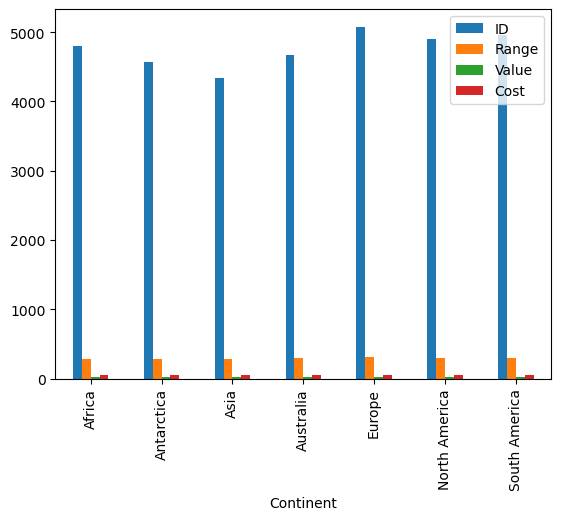

In [49]:
# 13.	Illustrate the mean of all numerical columns, group by the ‘Continent’, using a ‘bar’ chart.
continent_mean = myDF.groupby("Continent")[numeric_cols].mean()
continent_mean.plot(kind='bar')
plt.show()

In [51]:
# 14.	Count the number of each continent in the ‘Continent’ column. 
continent_count = myDF["Continent"].value_counts()
print(continent_count)

Continent
North America    143
Africa           143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: count, dtype: int64


In [ ]:
# 15.	Show the percentage of each continent in the ‘Continent’ column. 
continent_percentage = myDF['Continent'].value_counts(normalize=True) 
print(continent_percentage * 100)

Continent
North America    15.100317
Africa           15.100317
Australia        14.994720
Europe           14.677930
South America    14.255544
Asia             13.621964
Antarctica       12.249208
Name: proportion, dtype: float64


In [ ]:
# 16.	Show the unique values that we have in the ‘Continent’ column. Then show the number of unique values that we have in the ‘Continent’ column.
unique_continent = myDF["Continent"].unique()
print(unique_continent)

# how many unique values in the contient column
number_of_unique_continent = myDF["Continent"].nunique()
print(number_of_unique_continent)


['Asia' 'North America' 'Africa' 'Europe' 'Antarctica' 'South America'
 'Australia']
7


In [ ]:
cost_counts = myDF['Cost'].value_counts()
print(cost_counts)

# The output of the value_counts method for the "cost" column shows the frequency of each unique value.
# it lists up the unique values in descending order of their frequency. 
# this can help identify the most common cost values and understand the distrubution of costs in the dataset.

Cost
56    20
35    20
73    18
54    17
97    17
      ..
18     5
94     5
22     5
42     3
24     2
Name: count, Length: 90, dtype: int64


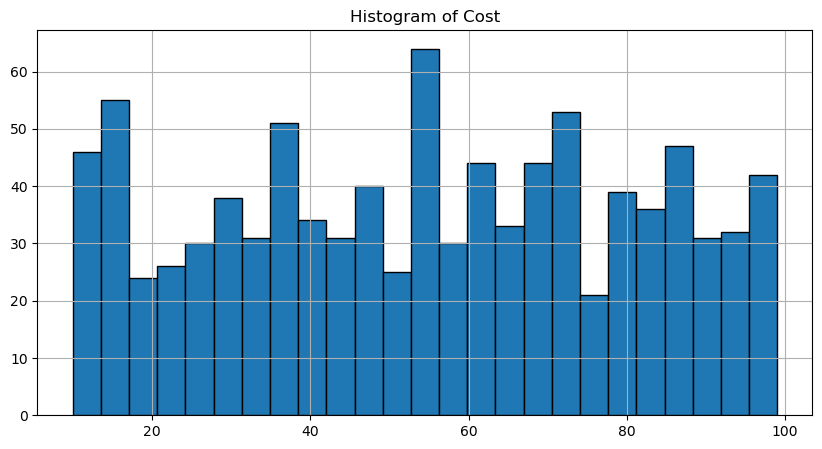

In [57]:
# 18.	Plot a histogram for the ‘Cost’ column. 
myDF["Cost"].hist(bins=25, edgecolor="black", figsize=(10, 5))
plt.title("Histogram of Cost")
plt.show()

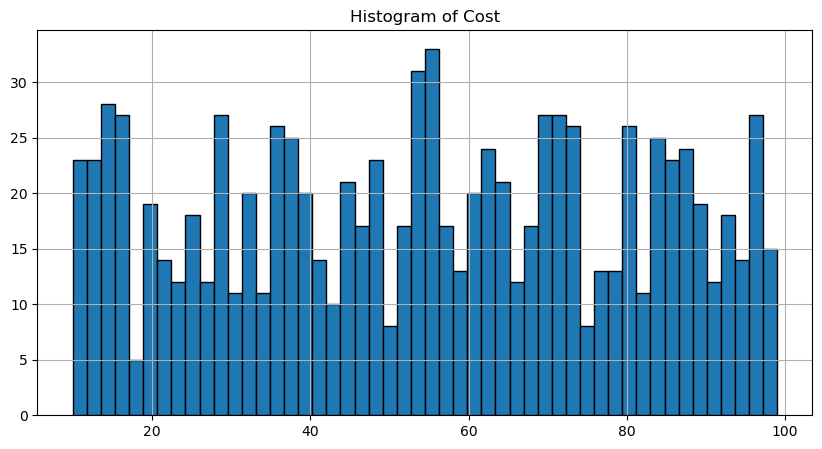

In [58]:
# set up the bins = 50

myDF["Cost"].hist(bins=50, edgecolor="black", figsize=(10, 5))
plt.title("Histogram of Cost")
plt.show()

In [ ]:
# 20.	How many missing values do we have in the ‘Zip Code’ column? 
# How many missing values in the ‘Type’ column? Provide a brief summary of null values for the entire Data Frame.


missing_zip_code = myDF["Zip Code"].isnull().sum()
print(missing_zip_code)

missing_type = myDF["Type"].isnull().sum()
print(missing_type)

null_summary = myDF.isnull().sum()
print(null_summary)

9
2
ID           0
Range        0
Value        0
Type         2
Zip Code     9
Cost         0
Continent    0
dtype: int64


In [ ]:
# 21.	If we drop all the rows that have ‘any’ missing value, how many rows will remain in myDF?
myDF_dropped = myDF.dropna()
remaining_rows = myDF_dropped.shape[0]


# how mnay rows will remain in the dataframe
print(remaining_rows)

936


In [64]:
# 22.	Show the statistics for the ‘Type’ column using the value_count method, 
# including the NaN values in the list. How many missing values do we have?


type_counts = myDF["Type"].value_counts(dropna=False)

print(type_counts)

missing_type_values = myDF["Type"].isnull().sum()
print(f"missing values in 'Type' column: {missing_type_values}")


Type
AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
NaN     2
Name: count, dtype: int64
missing values in 'Type' column: 2


In [65]:
# 23.	Replace the ‘Type’ column missing values with ‘XXX’ and show the result again.

myDF['Type'].fillna('XXX', inplace=True)
type_replacement = myDF["Type"].value_counts(dropna=False)
print(type_replacement)

Type
AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
XXX     2
Name: count, dtype: int64


In [67]:
# 24.	Drop the rows that have any missing value permanently and show the number of rows after running the drop command.

myDF.dropna(inplace=True)
remaining_rows = myDF.shape[0]
print(remaining_rows)

938


In [ ]:
# 25.	Set the ‘ID’ column as the new index and delete the index name. Then show the first 5 rows of the DF.
#  Show the value of the cell that its ID is 70 and its column header is ‘Value’.

myDF.set_index("ID", inplace=True)
myDF.index.name = None

print(myDF.head(5))

cell_value = myDF.loc[70, "Value"]
print(cell_value)

    Range  Value Type Zip Code  Cost      Continent
10    192     50  AAA   NXEYEM    56           Asia
30    378     28    X   IMGMFY    90  North America
50    468     33    J   HPQCMC    95         Africa
70    327     24  AAA   NLVQPY    25         Europe
80    495     50    Z   DLUMAX    70     Antarctica
24


In [69]:
# 26.	Show the index
# , columns and the shape of the current DF.
#  Bring back the ID column to the DF and reset the index.
#  Again, show the index, columns and the shape of the current DF.

print("Current Index: ", myDF.index)
print("Current Columns: ", myDF.columns)
print("Current Shape: ", myDF.shape)

myDF.reset_index(inplace=True)

# Updated Index, Columns, and Shape
print("Updated Index: ", myDF.index)
print("Updated Columns: ", myDF.columns)
print("Updated Shape: ", myDF.shape)
  

Current Index:  Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
       ...
       9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
      dtype='int64', length=938)
Current Columns:  Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
Current Shape:  (938, 6)
Updated Index:  RangeIndex(start=0, stop=938, step=1)
Updated Columns:  Index(['index', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')
Updated Shape:  (938, 7)


In [ ]:
# Drop "Model" column permanently
myDF = myDF.drop(columns=['Model'])
print(myDF.head())

   ID  Range  Value Type Zip Code   Cost      Continent
0  10    192     50    F   NXEYEM  [56$]           Asia
1  20    299     21    M   VNFKZD  [18$]           Asia
2  30    378     28    X   IMGMFY  [90$]  North America
3  40    156     44    Q   RHRHJY  [89$]           Asia
4  50    468     33    J   HPQCMC  [95$]         Africa


In [70]:
# 27.	Use the describe method to see the statistics of myDF and fetch the value of the first row and the third column of the result
statistics = myDF.describe()
print(statistics)

value_first_row_third_column = statistics.iloc[0, 2]
print(value_first_row_third_column)

             index       Range       Value        Cost
count   938.000000  938.000000  938.000000  938.000000
mean   4749.104478  297.531983   29.917910   54.611940
std    2739.076928  115.913345   12.292447   25.742149
min      10.000000  100.000000   10.000000   10.000000
25%    2382.500000  194.000000   19.000000   33.000000
50%    4725.000000  295.000000   30.000000   55.000000
75%    7097.500000  400.000000   41.000000   76.000000
max    9500.000000  500.000000   50.000000   99.000000
938.0


In [74]:
# 28.	Sort the value_counts() of the ‘Continent’ column of the DF. Then, sort the value_counts() of the ‘Continent’ column, based on the alphabetic order of the continents.

continent_counts = myDF["Continent"].value_counts().sort_values(ascending=False)
print(continent_counts)

continent_counts_alphabetic = myDF["Continent"].value_counts().sort_index()
print(continent_counts_alphabetic)

Continent
North America    141
Australia        141
Africa           139
Europe           138
South America    135
Asia             129
Antarctica       115
Name: count, dtype: int64
Continent
Africa           139
Antarctica       115
Asia             129
Australia        141
Europe           138
North America    141
South America    135
Name: count, dtype: int64


In [75]:
# 29.	Show all the columns of the following rows in one command. [1,3,5,7] and show the first 7 rows of the following columns: ‘Type’ and ‘Continent’
first_third_fifth_seventh = myDF.iloc[[1, 3, 5, 7]]
print(first_third_fifth_seventh)

first_7_rows_type_continent = myDF.loc[:6, ["Type", "Continent"]]
print(first_7_rows_type_continent)

   index  Range  Value Type Zip Code  Cost      Continent
1     30    378     28    X   IMGMFY    90  North America
3     70    327     24  AAA   NLVQPY    25         Europe
5     90    115     30    S   KYJUHA    17  South America
7    110    301     29    A   OVINZU    69  South America
  Type      Continent
0  AAA           Asia
1    X  North America
2    J         Africa
3  AAA         Europe
4    Z     Antarctica
5    S  South America
6    K  South America


In [77]:
# 30.	Show the ‘Value’ of the ‘Type’ that are equal to ’XXX’.

values_with_type_xxx = myDF.loc[myDF["Type"] == "XXX", "Value"]

print("Values with Type XXX: ", values_with_type_xxx)

Values with Type XXX:  687    42
743    37
Name: Value, dtype: int64
